## **TASK-3**
*Exploratory Data Analysis- Retail on Dataset - "Sample Superstore"*

In [81]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
sbn.set_style("whitegrid")

In [83]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [85]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [86]:
df["Category"].nunique()

3

In [87]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [88]:
df["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

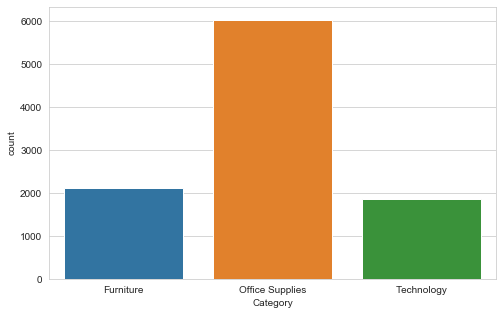

In [89]:
plt.figure(figsize = (8,5))
sbn.countplot(x = "Category", data = df)
plt.show()

In [90]:
df["Sub-Category"].nunique()

17

In [91]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [92]:
df["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

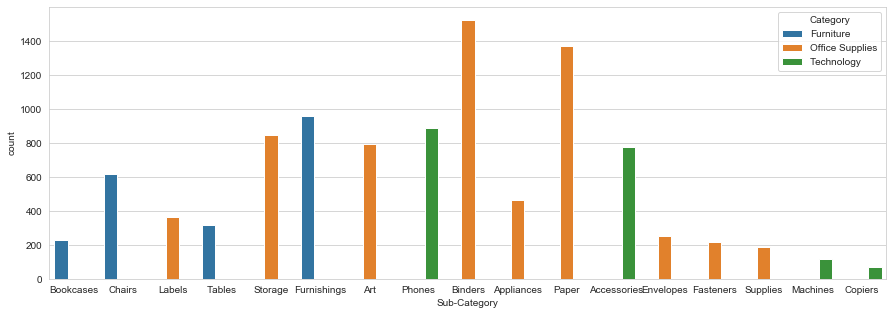

In [93]:
plt.figure(figsize =(15,5))
sbn.countplot(x = "Sub-Category", hue = "Category", data = df)
plt.show()

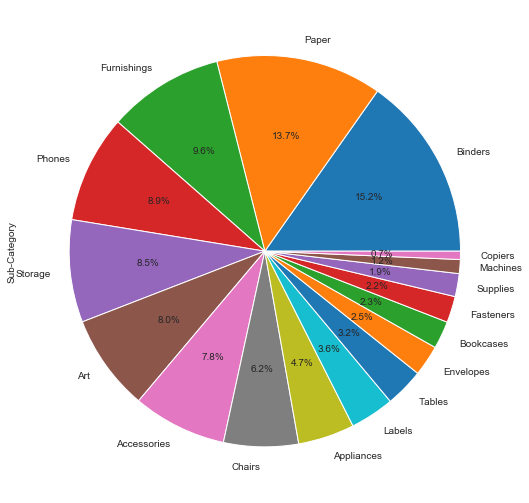

In [94]:
plt.figure(figsize =(9,9))
df["Sub-Category"].value_counts().plot.pie(autopct="%1.1f%%")

C:\Users\Pinchu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


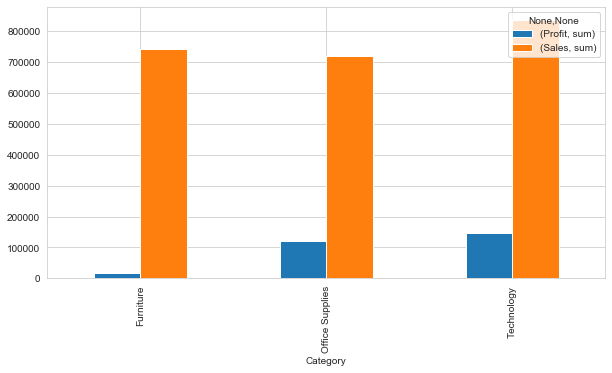

In [95]:
df.groupby('Category')["Profit","Sales"].agg(["sum"]).plot.bar(figsize =(10,5))
plt.show()

C:\Users\Pinchu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


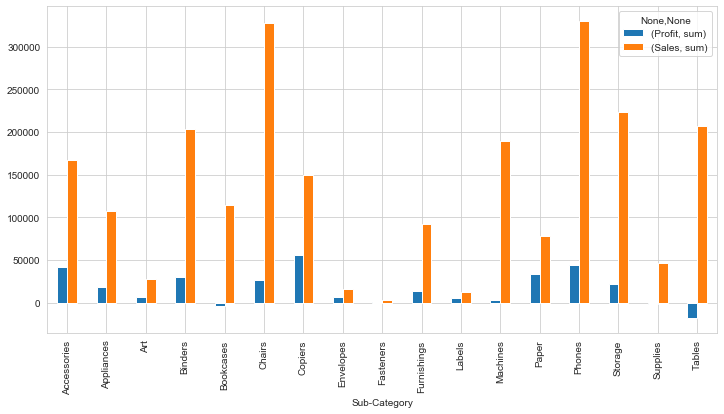

In [96]:
df.groupby('Sub-Category')["Profit","Sales"].agg(["sum"]).plot.bar(figsize =(12,6))

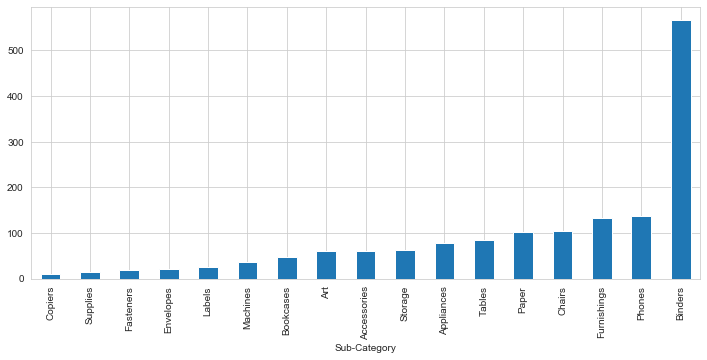

In [97]:
df.groupby("Sub-Category").sum()["Discount"].sort_values(ascending =True).plot.bar(figsize=(12,5))

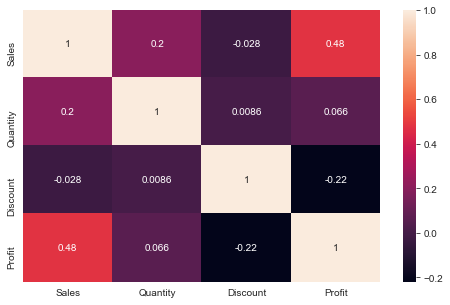

In [98]:
plt.figure(figsize=(8,5))
data = df[["Sales", "Quantity", "Discount", "Profit"]]
sbn.heatmap(data.corr(), annot = True)
plt.show()

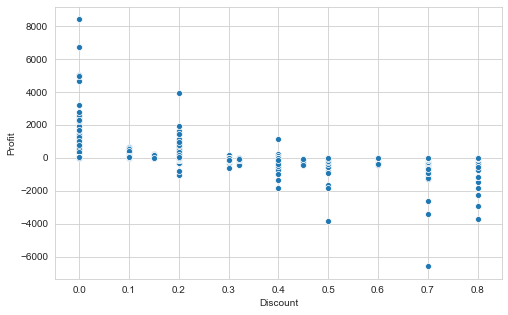

In [99]:
plt.figure(figsize=(8,5))
sbn.scatterplot("Discount","Profit", data = df)

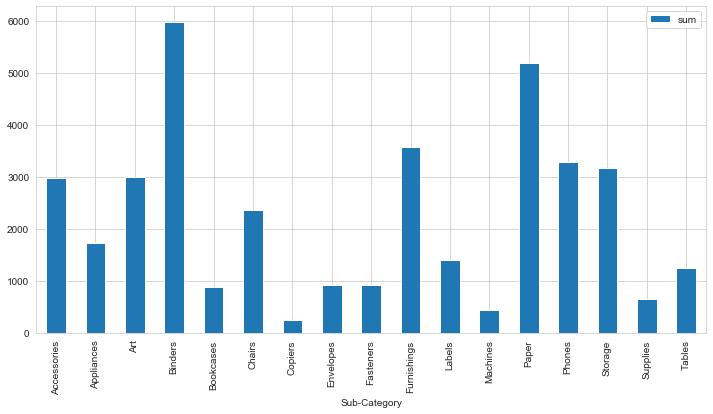

In [100]:
df.groupby('Sub-Category')["Quantity"].agg(["sum"]).plot.bar(figsize =(12,6))

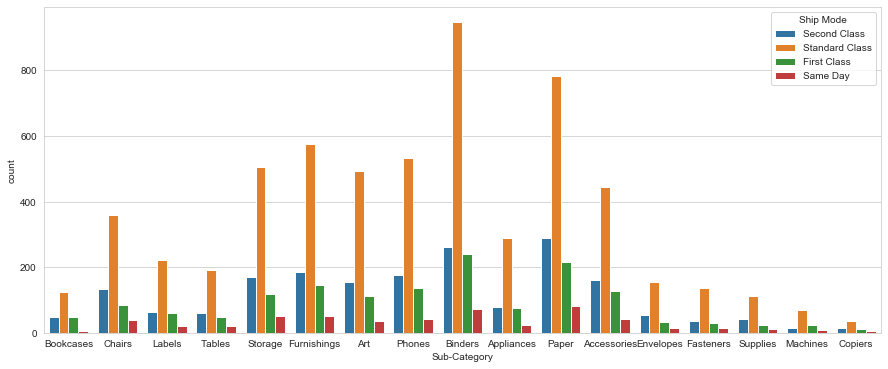

In [101]:
plt.figure(figsize=(15,6))
sbn.countplot(x ="Sub-Category",hue ="Ship Mode", data = df)

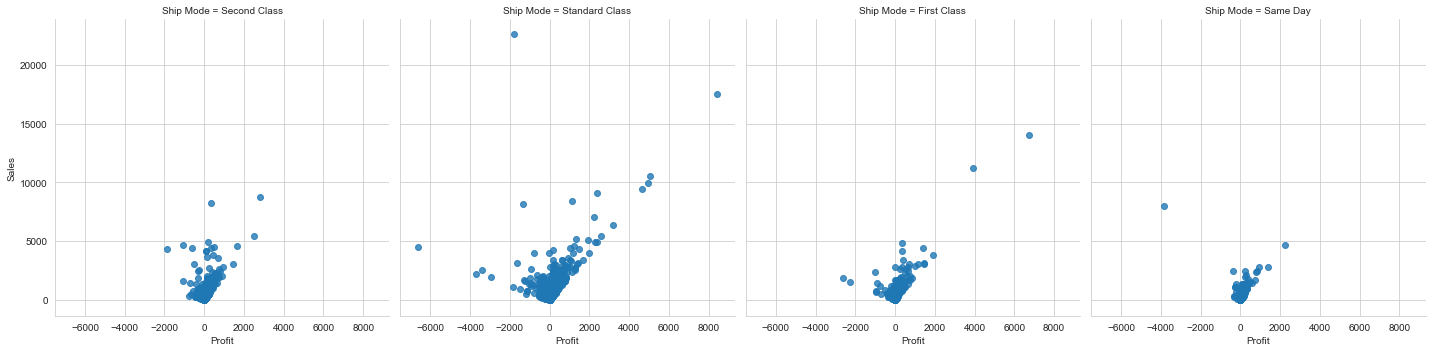

In [102]:
sbn.lmplot(x ="Profit",y ="Sales", data = df, fit_reg =False,col ="Ship Mode")
plt.show()

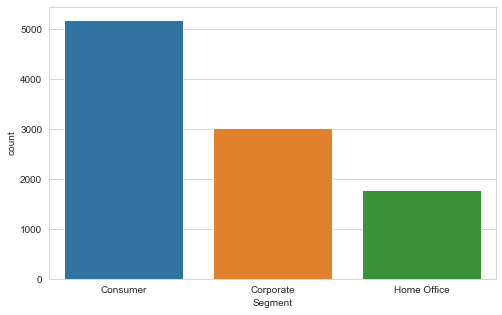

In [103]:
plt.figure(figsize=(8,5))
sbn.countplot(x ="Segment", data = df)
plt.show()

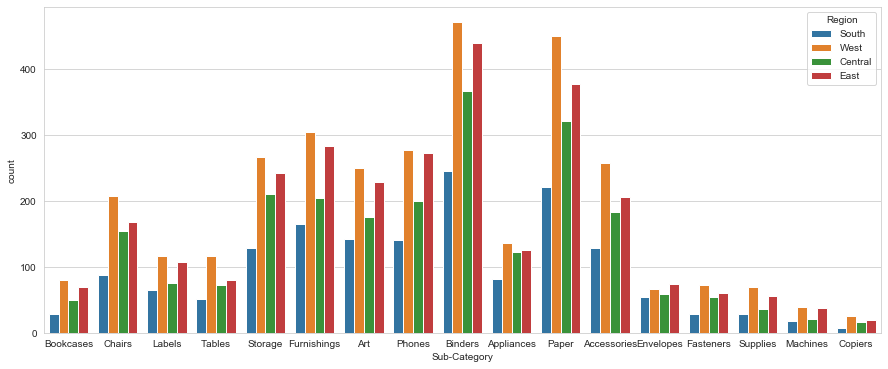

In [104]:
plt.figure(figsize=(15,6))
sbn.countplot(x ="Sub-Category",hue ="Region", data = df)

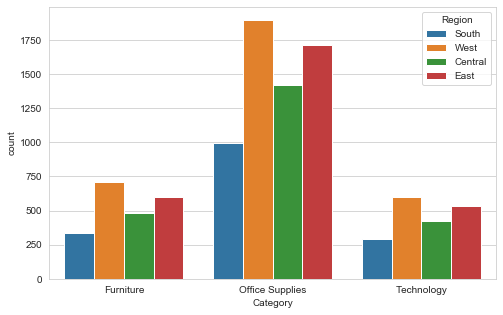

In [105]:
plt.figure(figsize=(8,5))
sbn.countplot(x ="Category",hue ="Region", data = df)

In [106]:
#citywise Profit and Loss
SV = pd.DataFrame(df.groupby("City").sum()["Profit"].sort_values(ascending =True))
SV.head(25)

,Profit
City,
Philadelphia,-13837.7674
Houston,-10153.5485
San Antonio,-7299.0502
Lancaster,-7239.0684
Chicago,-6654.5688
Burlington,-3622.8772
Dallas,-2846.5257
Phoenix,-2790.8832
Aurora,-2691.7386


In [107]:
pd.DataFrame(df.groupby("City").sum()["Profit"].sort_values(ascending =False)).head(25)

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


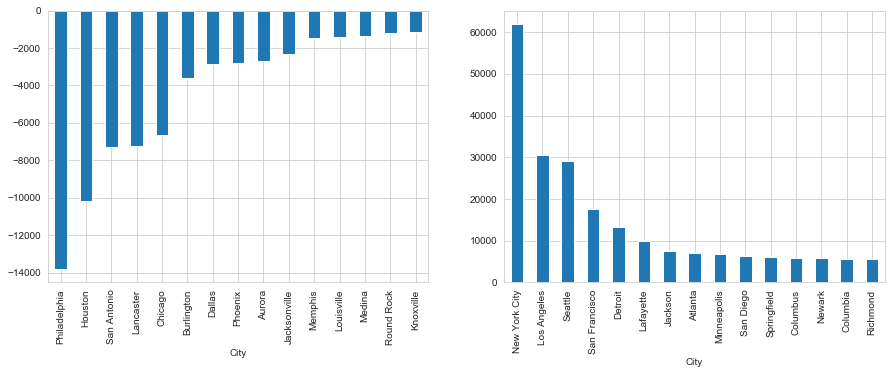

In [108]:
fig, axes = plt.subplots(1,2,figsize =(15,5))
df.groupby("City").sum()["Profit"].sort_values(ascending =True).head(15).plot.bar(ax=axes[0])
df.groupby("City").sum()["Profit"].sort_values(ascending =False).head(15).plot.bar(ax=axes[1])

In [109]:
#Statewise Profit and Loss
pd.DataFrame(df.groupby("State").sum()["Profit"].sort_values(ascending =True)).head(25)

,Profit
State,
Texas,-25729.3563
Ohio,-16971.3766
Pennsylvania,-15559.9603
Illinois,-12607.8870
North Carolina,-7490.9122
Colorado,-6527.8579
Tennessee,-5341.6936
Arizona,-3427.9246
Florida,-3399.3017


In [110]:
pd.DataFrame(df.groupby("State").sum()["Profit"].sort_values(ascending =False)).head(25)

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


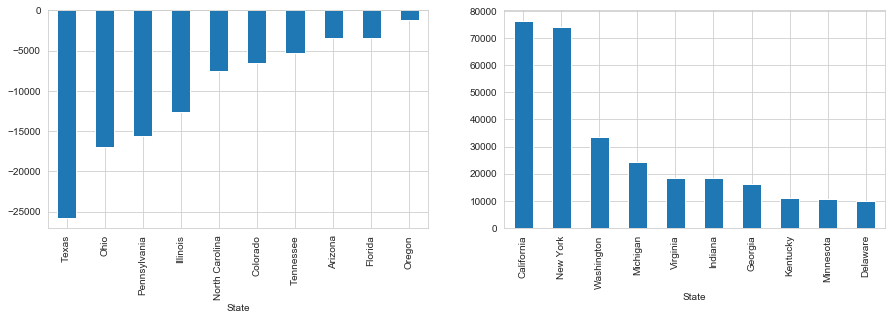

In [111]:
fig, axes = plt.subplots(1,2,figsize =(15,4))
df.groupby("State").sum()["Profit"].sort_values(ascending =True).head(10).plot.bar(ax=axes[0])
df.groupby("State").sum()["Profit"].sort_values(ascending =False).head(10).plot.bar(ax=axes[1])